In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Ensure you import this for date formatting
import pandas as pd

!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

# อัปเดตแคชฟอนต์
!fc-cache -fv

# เพิ่มฟอนต์
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')

# ตั้งค่าฟอนต์ใน Matplotlib
mpl.rcParams['font.family'] = 'TH Sarabun New'  # ใช้ชื่อฟอนต์ที่ถูกต้อง
mpl.rcParams['axes.unicode_minus'] = False

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
import os

# List all files in the /content directory
files = os.listdir('/content')
csv_files = [file for file in files if file.endswith('.csv')]

print(csv_files)  # Verify the list of CSV files

import pandas as pd

# Read and concatenate all the CSV files in the list
df_list = [pd.read_csv(f'/content/{file}',encoding='TIS-620') for file in csv_files]

# Concatenate all DataFrames into one
combined_df = pd.concat(df_list, ignore_index=True)

# Print the first few rows of the combined DataFrame
print(combined_df.head())

['dam_2018.csv', 'dam_2023.csv', 'dam_2015.csv', 'dam_2019.csv', 'dam_2021.csv', 'dam_2020.csv', 'dam_2022.csv', 'dam_2016.csv', 'dam_2017.csv', 'dam_2014.csv', 'dam_2024.csv']
       id                   name        owner  capacity  storage  \
0  100104   เขื่อนแม่กวงอุดมธารา  กรมชลประทาน    295.00   263.00   
1  100105           เขื่อนกิ่วลม  กรมชลประทาน    106.22   106.22   
2  100106        เขื่อนกิ่วคอหมา  กรมชลประทาน    208.60   170.00   
3  100107  เขื่อนแควน้อยบำรุงแดน  กรมชลประทาน   1080.00   939.00   
4  100108           เขื่อนแม่มอก  กรมชลประทาน    110.00   110.00   

   active_storage  dead_storage  volume  percent_storage  inflow  outflow  \
0          249.00         14.00  130.02            49.44   0.046    0.597   
1          102.67          3.55   98.70            92.92   1.277    2.026   
2          163.80          6.20  177.59           104.46   0.248    0.248   
3          896.00         43.00  826.25            87.99   1.040    5.184   
4           94.10         15.

In [3]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137375 entries, 0 to 137374
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               137375 non-null  int64  
 1   name             137375 non-null  object 
 2   owner            137375 non-null  object 
 3   capacity         137375 non-null  float64
 4   storage          137375 non-null  float64
 5   active_storage   137375 non-null  float64
 6   dead_storage     137375 non-null  float64
 7   volume           131911 non-null  float64
 8   percent_storage  131911 non-null  float64
 9   inflow           100256 non-null  float64
 10  outflow          114422 non-null  float64
 11  date             137375 non-null  object 
dtypes: float64(8), int64(1), object(3)
memory usage: 12.6+ MB


In [4]:
# เช็คข้อมูล outlier
rows_with_percent_storage_greater_than_200 = combined_df[combined_df['percent_storage'] > 200]
print(rows_with_percent_storage_greater_than_200)

           id                  name        owner  capacity  storage  \
38496  100602        เขื่อนปราณบุรี  กรมชลประทาน    490.00   391.00   
38994  100108          เขื่อนแม่มอก  กรมชลประทาน    110.00   110.00   
47945  100514   เขื่อนนฤบดินทรจินดา  กรมชลประทาน    338.00   295.00   
48923  100504      เขื่อนหนองปลาไหล  กรมชลประทาน    205.85   163.75   
49938  100504      เขื่อนหนองปลาไหล  กรมชลประทาน    205.85   163.75   
59912  100503          เขื่อนบางพระ  กรมชลประทาน    127.00   117.00   
60690  100104  เขื่อนแม่กวงอุดมธารา  กรมชลประทาน    295.00   263.00   
71778  100504      เขื่อนหนองปลาไหล  กรมชลประทาน    205.85   163.75   
75241  100502       เขื่อนคลองสียัด  กรมชลประทาน    450.00   420.00   
81650  100514   เขื่อนนฤบดินทรจินดา  กรมชลประทาน    338.00   295.00   

       active_storage  dead_storage     volume  percent_storage  inflow  \
38496          373.41         17.59  343292.00         87798.47   0.585   
38994           94.10         15.90     458.27           416.61     

In [5]:
# Remove rows where 'volume' or 'percent_storage' is NaN
combined_df = combined_df.dropna(subset=['volume', 'percent_storage'])

In [6]:
rows_with_percent_storage_greater_than_500 = combined_df[combined_df['percent_storage'] > 500]
print(rows_with_percent_storage_greater_than_500)

inflow_outlier = combined_df[combined_df['inflow'] > 100000]
inflow_outlier.info()
print(inflow_outlier)

outflow_outlier = combined_df[combined_df['outflow'] > 100]
outflow_outlier.info()
print(outflow_outlier)

           id                  name        owner  capacity  storage  \
38496  100602        เขื่อนปราณบุรี  กรมชลประทาน    490.00   391.00   
47945  100514   เขื่อนนฤบดินทรจินดา  กรมชลประทาน    338.00   295.00   
48923  100504      เขื่อนหนองปลาไหล  กรมชลประทาน    205.85   163.75   
49938  100504      เขื่อนหนองปลาไหล  กรมชลประทาน    205.85   163.75   
59912  100503          เขื่อนบางพระ  กรมชลประทาน    127.00   117.00   
60690  100104  เขื่อนแม่กวงอุดมธารา  กรมชลประทาน    295.00   263.00   
71778  100504      เขื่อนหนองปลาไหล  กรมชลประทาน    205.85   163.75   

       active_storage  dead_storage     volume  percent_storage  inflow  \
38496          373.41         17.59  343292.00         87798.47   0.585   
47945          280.75         14.25    2242.18           760.06   0.890   
48923          150.25         13.50   97964.00         59825.34   0.557   
49938          150.25         13.50   51898.00         31693.44   0.091   
59912          104.94         12.06  470115.00        40

In [7]:
# Filter out rows where 'percent_storage' is greater than 500
combined_df = combined_df[combined_df['percent_storage'] <= 500]
combined_df = combined_df[combined_df['inflow'] < 100000]
combined_df = combined_df[combined_df['outflow'] < 200]



In [8]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87692 entries, 0 to 137374
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               87692 non-null  int64  
 1   name             87692 non-null  object 
 2   owner            87692 non-null  object 
 3   capacity         87692 non-null  float64
 4   storage          87692 non-null  float64
 5   active_storage   87692 non-null  float64
 6   dead_storage     87692 non-null  float64
 7   volume           87692 non-null  float64
 8   percent_storage  87692 non-null  float64
 9   inflow           87692 non-null  float64
 10  outflow          87692 non-null  float64
 11  date             87692 non-null  object 
dtypes: float64(8), int64(1), object(3)
memory usage: 8.7+ MB


In [9]:
dam_region_dict = {
    "เขื่อนแม่กวงอุดมธารา": "ภาคเหนือ",
    "เขื่อนกิ่วลม": "ภาคเหนือ",
    "เขื่อนกิ่วคอหมา": "ภาคเหนือ",
    "เขื่อนแควน้อยบำรุงแดน": "ภาคเหนือ",
    "เขื่อนแม่มอก": "ภาคเหนือ",
    "เขื่อนภูมิพล": "ภาคเหนือ",
    "เขื่อนสิริกิติ์": "ภาคเหนือ",
    "เขื่อนแม่งัดสมบูรณ์ชล": "ภาคเหนือ",
    "เขื่อนห้วยหลวง": "ภาคตะวันออกเฉียงเหนือ",
    "เขื่อนน้ำอูน": "ภาคตะวันออกเฉียงเหนือ",
    "เขื่อนลำปาว": "ภาคตะวันออกเฉียงเหนือ",
    "เขื่อนลำตะคอง": "ภาคตะวันออกเฉียงเหนือ",
    "เขื่อนลำพระเพลิง": "ภาคตะวันออกเฉียงเหนือ",
    "เขื่อนมูลบน": "ภาคตะวันออกเฉียงเหนือ",
    "เขื่อนลำแซะ": "ภาคตะวันออกเฉียงเหนือ",
    "เขื่อนลำนางรอง": "ภาคตะวันออกเฉียงเหนือ",
    "เขื่อนน้ำพุง": "ภาคตะวันออกเฉียงเหนือ",
    "เขื่อนจุฬาภรณ์": "ภาคตะวันออกเฉียงเหนือ",
    "เขื่อนอุบลรัตน์": "ภาคตะวันออกเฉียงเหนือ",
    "เขื่อนสิรินธร": "ภาคตะวันออกเฉียงเหนือ",
    "เขื่อนป่าสักชลสิทธิ์": "ภาคกลาง",
    "เขื่อนทับเสลา": "ภาคกลาง",
    "เขื่อนกระเสียว": "ภาคกลาง",
    "เขื่อนศรีนครินทร์": "ภาคตะวันตก",
    "เขื่อนวชิราลงกรณ์": "ภาคตะวันตก",
    "เขื่อนขุนด่านปราการชล": "ภาคตะวันออก",
    "เขื่อนคลองสียัด": "ภาคตะวันออก",
    "เขื่อนบางพระ": "ภาคตะวันออก",
    "เขื่อนหนองปลาไหล": "ภาคตะวันออก",
    "เขื่อนประแสร์": "ภาคตะวันออก",
    "เขื่อนนฤบดินทรจินดา": "ภาคตะวันออก",
    "เขื่อนปราณบุรี": "ภาคใต้",
    "เขื่อนแก่งกระจาน": "ภาคใต้",
    "เขื่อนรัชชประภา": "ภาคใต้",
    "เขื่อนบางลาง": "ภาคใต้"
}

dam_region_dict_df = pd.DataFrame(list(dam_region_dict.items()), columns=['name', 'region'])

In [10]:
# Merge the DataFrames based on the 'ชื่อเขื่อน' column
merged_df = pd.merge(combined_df, dam_region_dict_df, left_on='name', right_on='name', how='left')
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df['year'] = merged_df['date'].dt.year
merged_df.rename(columns={'region':'region_y'},inplace=True)

merged_df = merged_df.dropna(subset=['volume', 'percent_storage'], how='all')
# Print the first few rows of the merged DataFrame
print(merged_df.head())
merged_df.info()

       id                   name        owner  capacity  storage  \
0  100104   เขื่อนแม่กวงอุดมธารา  กรมชลประทาน    295.00   263.00   
1  100105           เขื่อนกิ่วลม  กรมชลประทาน    106.22   106.22   
2  100106        เขื่อนกิ่วคอหมา  กรมชลประทาน    208.60   170.00   
3  100107  เขื่อนแควน้อยบำรุงแดน  กรมชลประทาน   1080.00   939.00   
4  100108           เขื่อนแม่มอก  กรมชลประทาน    110.00   110.00   

   active_storage  dead_storage  volume  percent_storage  inflow  outflow  \
0          249.00         14.00  130.02            49.44   0.046    0.597   
1          102.67          3.55   98.70            92.92   1.277    2.026   
2          163.80          6.20  177.59           104.46   0.248    0.248   
3          896.00         43.00  826.25            87.99   1.040    5.184   
4           94.10         15.90   96.70            87.91   0.779    1.399   

        date  region_y  year  
0 2018-01-01  ภาคเหนือ  2018  
1 2018-01-01  ภาคเหนือ  2018  
2 2018-01-01  ภาคเหนือ  2018  
3 20

In [11]:
# Filter for region_y = ภาคเหนือ
northern_region_df = merged_df[merged_df['region_y'] == 'ภาคเหนือ']

# Select distinct name and storage
result_df = northern_region_df[['name', 'storage']].drop_duplicates()

# Display the result
print(result_df)

                    name   storage
0   เขื่อนแม่กวงอุดมธารา    263.00
1           เขื่อนกิ่วลม    106.22
2        เขื่อนกิ่วคอหมา    170.00
3  เขื่อนแควน้อยบำรุงแดน    939.00
4           เขื่อนแม่มอก    110.00
5           เขื่อนภูมิพล  13462.00
6        เขื่อนสิริกิติ์   9510.00
7  เขื่อนแม่งัดสมบูรณ์ชล    265.00


In [12]:
merged_df[merged_df['region_y'] == 'ภาคเหนือ'].describe()

,id,capacity,storage,active_storage,dead_storage,volume,percent_storage,inflow,outflow,date,year
count,25124.000000,25124.000000,25124.000000,25124.000000,25124.000000,25124.000000,25124.000000,25124.000000,25124.000000,25124,25124.000000
mean,136850.182574,3291.079336,3110.647852,2262.486843,848.161009,1589.174594,52.319179,4.957033,3.995332,2019-06-07 16:04:51.163827456,2018.911877
min,100104.000000,106.220000,106.220000,94.100000,3.550000,1.540000,1.400000,0.001000,0.010000,2014-01-01 00:00:00,2014.000000
25%,100105.000000,110.000000,110.000000,102.670000,12.000000,67.000000,34.657500,0.240000,0.230000,2016-10-24 00:00:00,2016.000000
50%,100107.000000,295.000000,263.000000,249.000000,14.000000,139.480000,47.730000,0.842500,1.040000,2019-06-18 00:00:00,2019.000000
75%,200102.000000,10508.000000,9510.000000,6660.000000,2850.000000,3353.807500,67.642500,3.320000,4.320000,2022-02-17 00:00:00,2022.000000
max,200103.000000,13462.000000,13462.000000,9662.000000,3800.000000,12171.000000,114.750000,903.140000,195.000000,2024-09-30 00:00:00,2024.000000
std,48210.350905,5046.947507,4861.409107,3429.979784,1434.997852,2608.107207,23.982262,15.559237,6.634792,NaN,3.112384


In [13]:
merged_df[merged_df['region_y'] == 'ภาคเหนือ'][['percent_storage', 'outflow']].describe()

,percent_storage,outflow
count,25124.000000,25124.000000
mean,52.319179,3.995332
std,23.982262,6.634792
min,1.400000,0.010000
25%,34.657500,0.230000
50%,47.730000,1.040000
75%,67.642500,4.320000
max,114.750000,195.000000


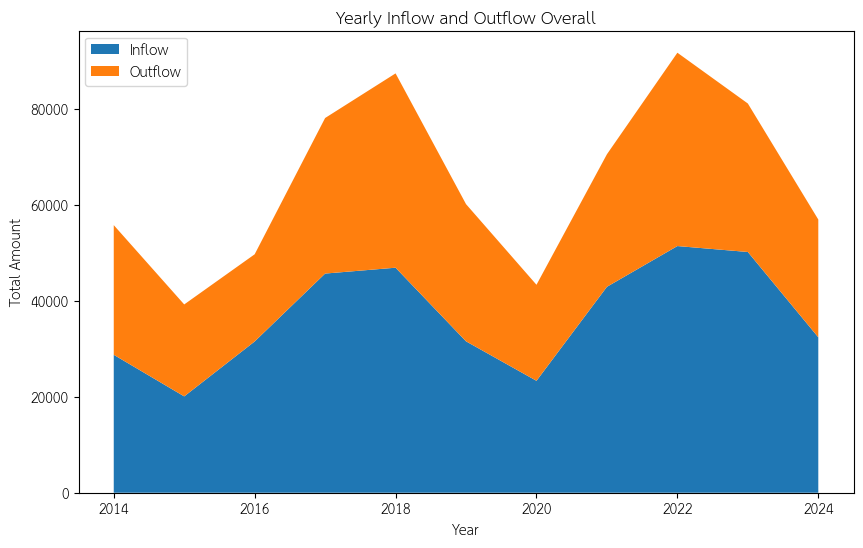

In [14]:
# Convert 'date' column to datetime objects
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Extract year from the date
combined_df['year'] = combined_df['date'].dt.year

# Group by year and calculate total inflow and outflow
yearly_data = combined_df.groupby('year').agg({'inflow': 'sum', 'outflow': 'sum'})

# Create the area chart
plt.figure(figsize=(10, 6))
plt.stackplot(yearly_data.index, yearly_data['inflow'], yearly_data['outflow'], labels=['Inflow', 'Outflow'])
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.title('Yearly Inflow and Outflow Overall')
plt.legend(loc='upper left')
plt.show()


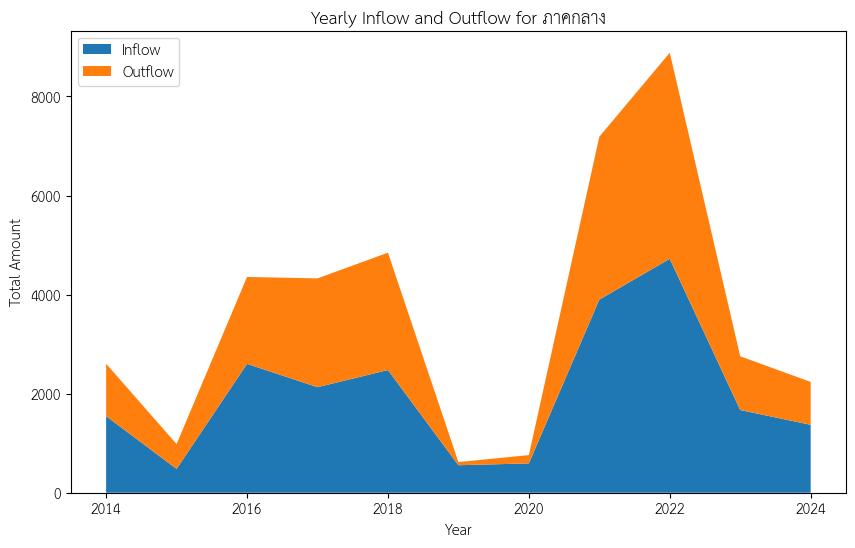

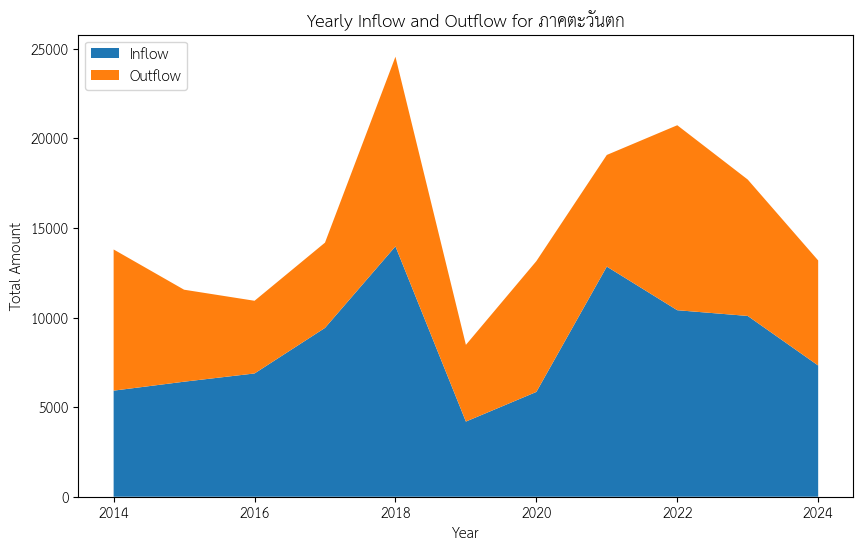

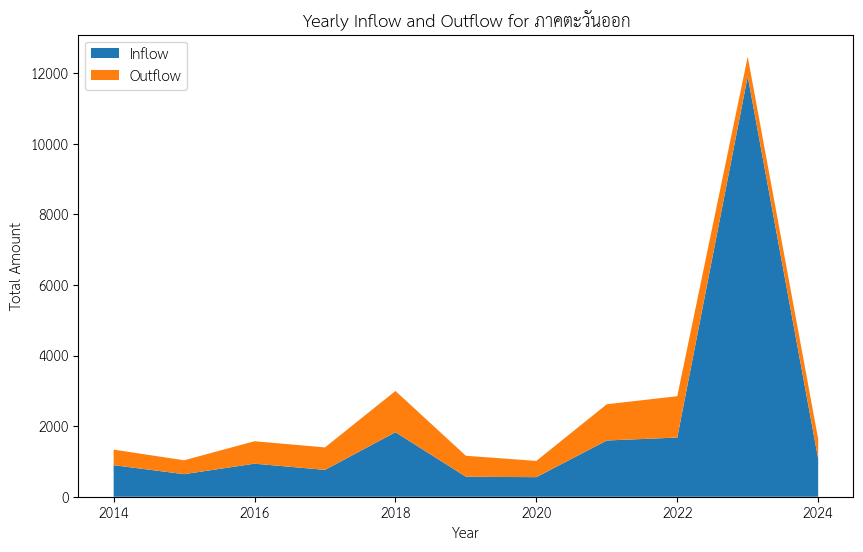

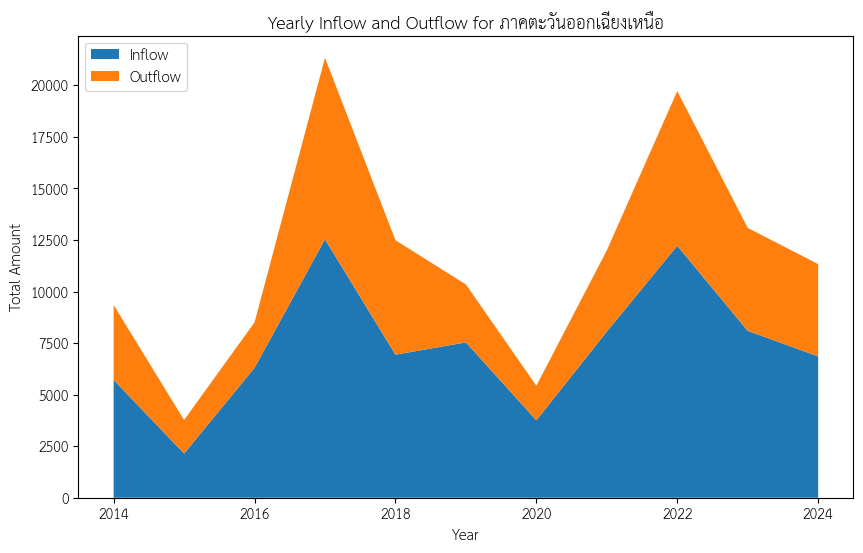

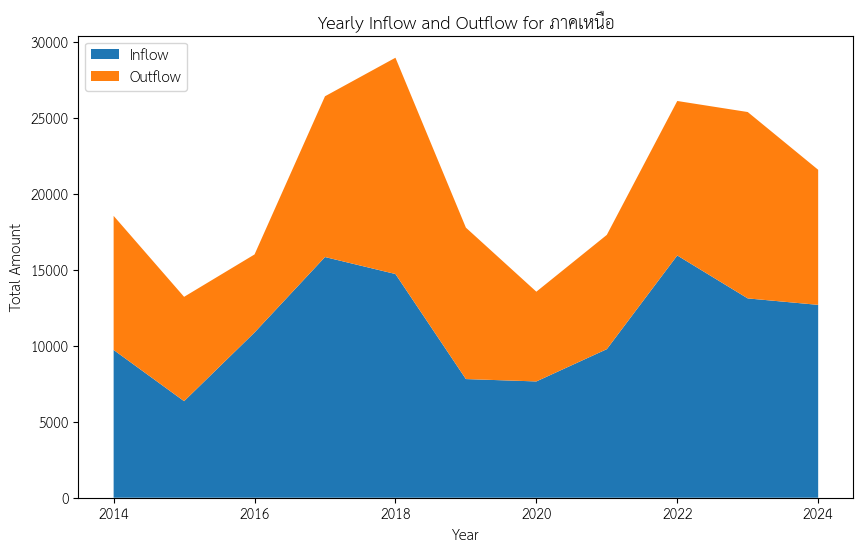

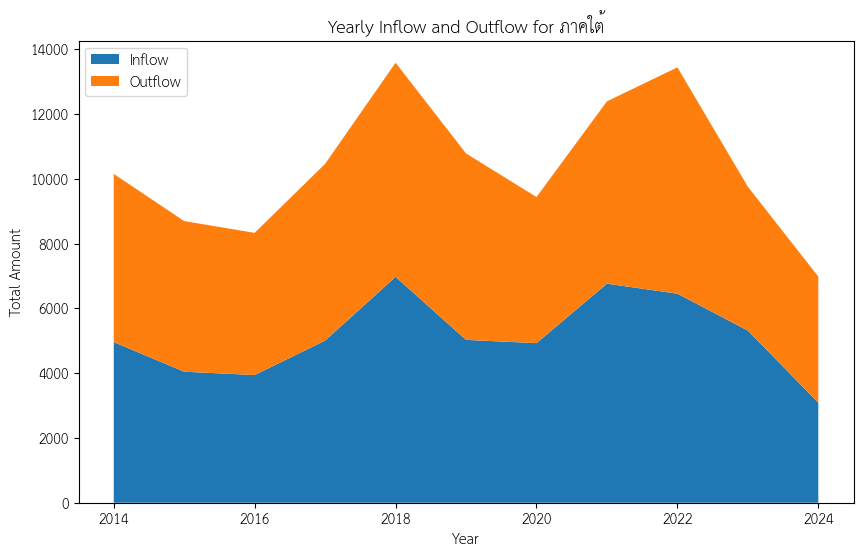

In [15]:
# Group by region, year, and calculate total inflow and outflow
region_yearly_data = merged_df.groupby(['region_y', 'year']).agg({'inflow': 'sum', 'outflow': 'sum'})

# Iterate through each region and create a separate area chart
for region, data in region_yearly_data.groupby('region_y'):
  plt.figure(figsize=(10, 6))
  plt.stackplot(data.index.get_level_values('year'), data['inflow'], data['outflow'], labels=['Inflow', 'Outflow'])
  plt.xlabel('Year')
  plt.ylabel('Total Amount')
  plt.title(f'Yearly Inflow and Outflow for {region}')
  plt.legend(loc='upper left')
  plt.show()


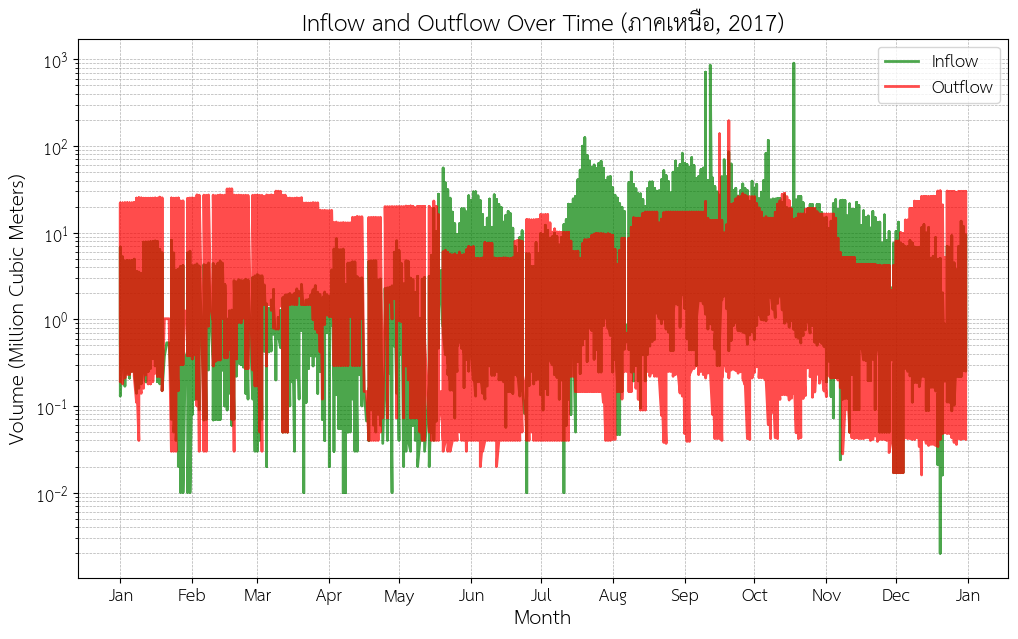

In [16]:
# Signal 1 Inflow and Outflow Over Time
# Filter the DataFrame for the desired region and year
df_north_2017 = merged_df[(merged_df['region_y'] == 'ภาคเหนือ') & (merged_df['date'].dt.year == 2017)]

# Create the plot
plt.figure(figsize=(12, 7))

# Plot inflow and outflow with improved style
plt.plot(df_north_2017['date'], df_north_2017['inflow'], label='Inflow', color='green', linestyle='-', linewidth=2, alpha=0.7)
plt.plot(df_north_2017['date'], df_north_2017['outflow'], label='Outflow', color='red', linestyle='-', linewidth=2, alpha=0.7)

# Set y-axis to logarithmic scale
plt.yscale('log')

# Title and labels with larger font sizes
plt.title('Inflow and Outflow Over Time (ภาคเหนือ, 2017)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Volume (Million Cubic Meters)', fontsize=14)

# Adjust legend with larger font size
plt.legend(fontsize=12)

# Improve grid style
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Format x-axis to show month labels
plt.gca().xaxis.set_major_locator(mpl.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mpl.dates.DateFormatter('%b'))

# Adjust ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


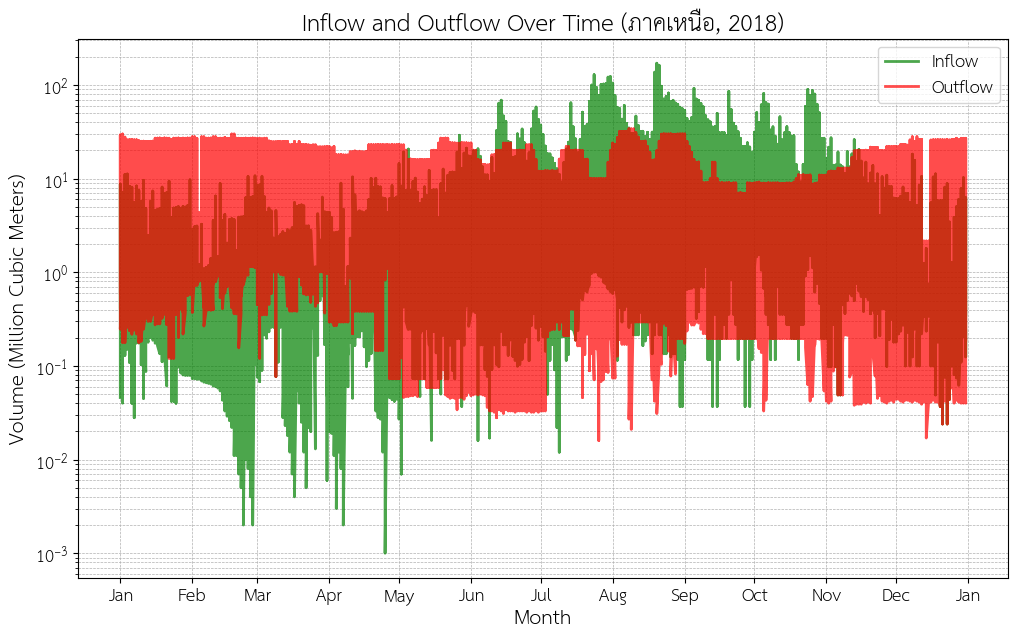

In [17]:

# Filter the DataFrame for the desired region and year
df_north_2018 = merged_df[(merged_df['region_y'] == 'ภาคเหนือ') & (merged_df['date'].dt.year == 2018)]

# Create the plot
plt.figure(figsize=(12, 7))

# Plot inflow and outflow with improved style
plt.plot(df_north_2018['date'], df_north_2018['inflow'], label='Inflow', color='green', linestyle='-', linewidth=2, alpha=0.7)
plt.plot(df_north_2018['date'], df_north_2018['outflow'], label='Outflow', color='red', linestyle='-', linewidth=2, alpha=0.7)

# Set y-axis to logarithmic scale
plt.yscale('log')

# Title and labels with larger font sizes
plt.title('Inflow and Outflow Over Time (ภาคเหนือ, 2018)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Volume (Million Cubic Meters)', fontsize=14)

# Adjust legend with larger font size
plt.legend(fontsize=12)

# Improve grid style
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Format x-axis to show month labels
plt.gca().xaxis.set_major_locator(mpl.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mpl.dates.DateFormatter('%b'))

# Adjust ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

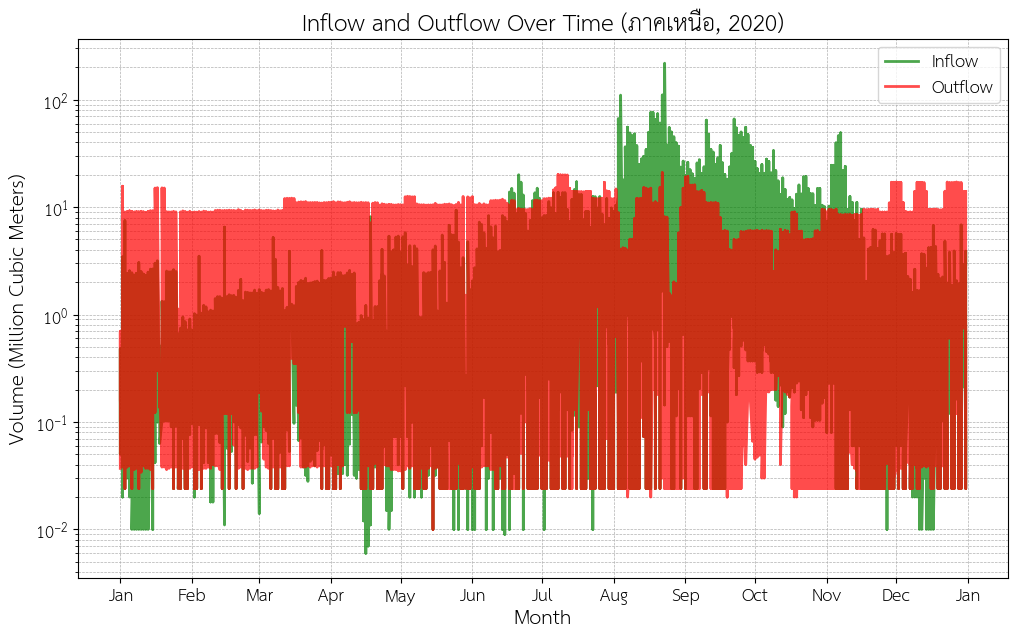

In [18]:

# Filter the DataFrame for the desired region and year
df_north_2020 = merged_df[(merged_df['region_y'] == 'ภาคเหนือ') & (merged_df['date'].dt.year == 2020)]

# Create the plot
plt.figure(figsize=(12, 7))

# Plot inflow and outflow with improved style
plt.plot(df_north_2020['date'], df_north_2020['inflow'], label='Inflow', color='green', linestyle='-', linewidth=2, alpha=0.7)
plt.plot(df_north_2020['date'], df_north_2020['outflow'], label='Outflow', color='red', linestyle='-', linewidth=2, alpha=0.7)

# Set y-axis to logarithmic scale
plt.yscale('log')

# Title and labels with larger font sizes
plt.title('Inflow and Outflow Over Time (ภาคเหนือ, 2020)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Volume (Million Cubic Meters)', fontsize=14)

# Adjust legend with larger font size
plt.legend(fontsize=12)

# Improve grid style
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Format x-axis to show month labels
plt.gca().xaxis.set_major_locator(mpl.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mpl.dates.DateFormatter('%b'))

# Adjust ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


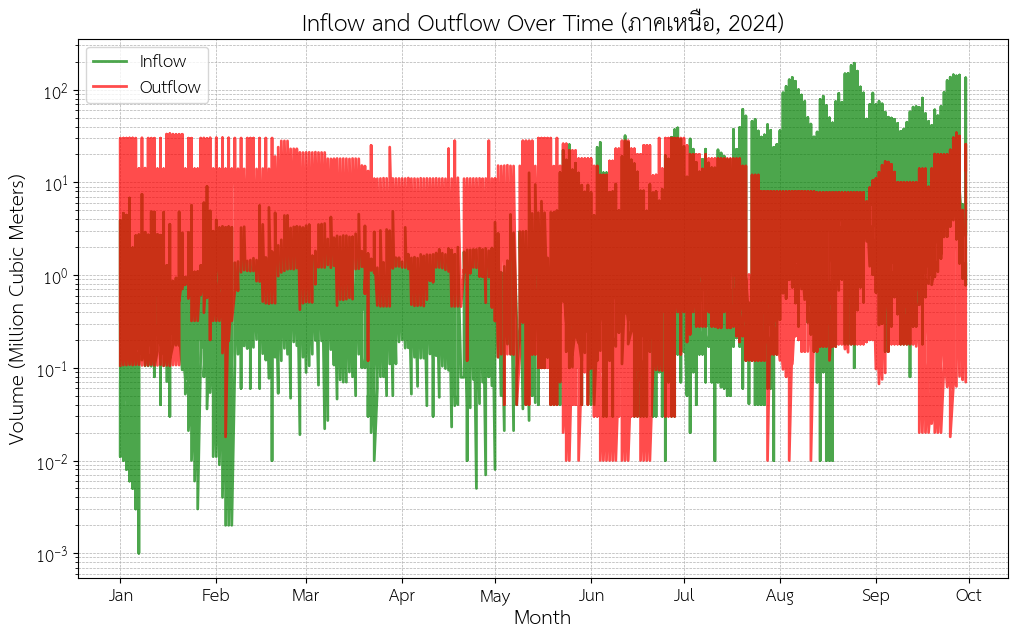

In [19]:
# Filter the DataFrame for the desired region and year
df_north_2024 = merged_df[(merged_df['region_y'] == 'ภาคเหนือ') & (merged_df['date'].dt.year == 2024)]

# Create the plot
plt.figure(figsize=(12, 7))

# Plot inflow and outflow with improved style
plt.plot(df_north_2024['date'], df_north_2024['inflow'], label='Inflow', color='green', linestyle='-', linewidth=2, alpha=0.7)
plt.plot(df_north_2024['date'], df_north_2024['outflow'], label='Outflow', color='red', linestyle='-', linewidth=2, alpha=0.7)

# Set y-axis to logarithmic scale
plt.yscale('log')

# Title and labels with larger font sizes
plt.title('Inflow and Outflow Over Time (ภาคเหนือ, 2024)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Volume (Million Cubic Meters)', fontsize=14)

# Adjust legend with larger font size
plt.legend(fontsize=12)

# Improve grid style
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Format x-axis to show month labels
plt.gca().xaxis.set_major_locator(mpl.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mpl.dates.DateFormatter('%b'))

# Adjust ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

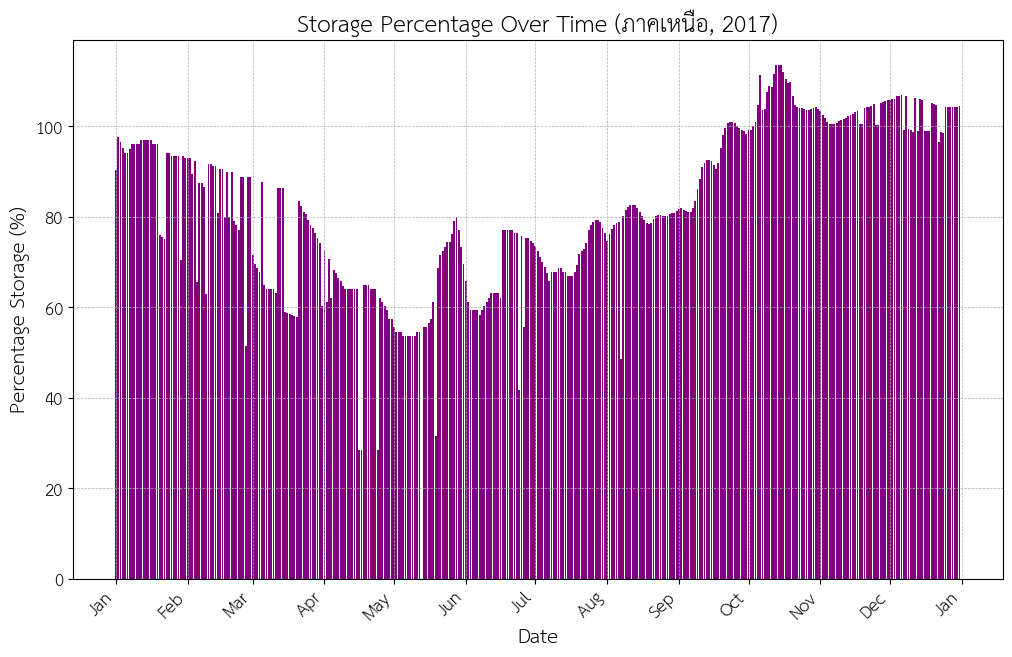

In [20]:
# Signal 2 Storage Percentage Over Time
# Filter the DataFrame for the desired region and year
df_north_2018 = merged_df[(merged_df['region_y'] == 'ภาคเหนือ') & (merged_df['date'].dt.year == 2017)]

# Create the bar chart
plt.figure(figsize=(12, 7))
plt.bar(df_north_2018['date'], df_north_2018['percent_storage'], color='purple')

# Title and labels with larger font sizes
plt.title('Storage Percentage Over Time (ภาคเหนือ, 2017)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percentage Storage (%)', fontsize=14)

# Format x-axis to show month labels (optional, if you want to rotate the labels)
plt.gca().xaxis.set_major_locator(mpl.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mpl.dates.DateFormatter('%b'))
plt.xticks(rotation=45, ha='right')

# Improve grid style
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


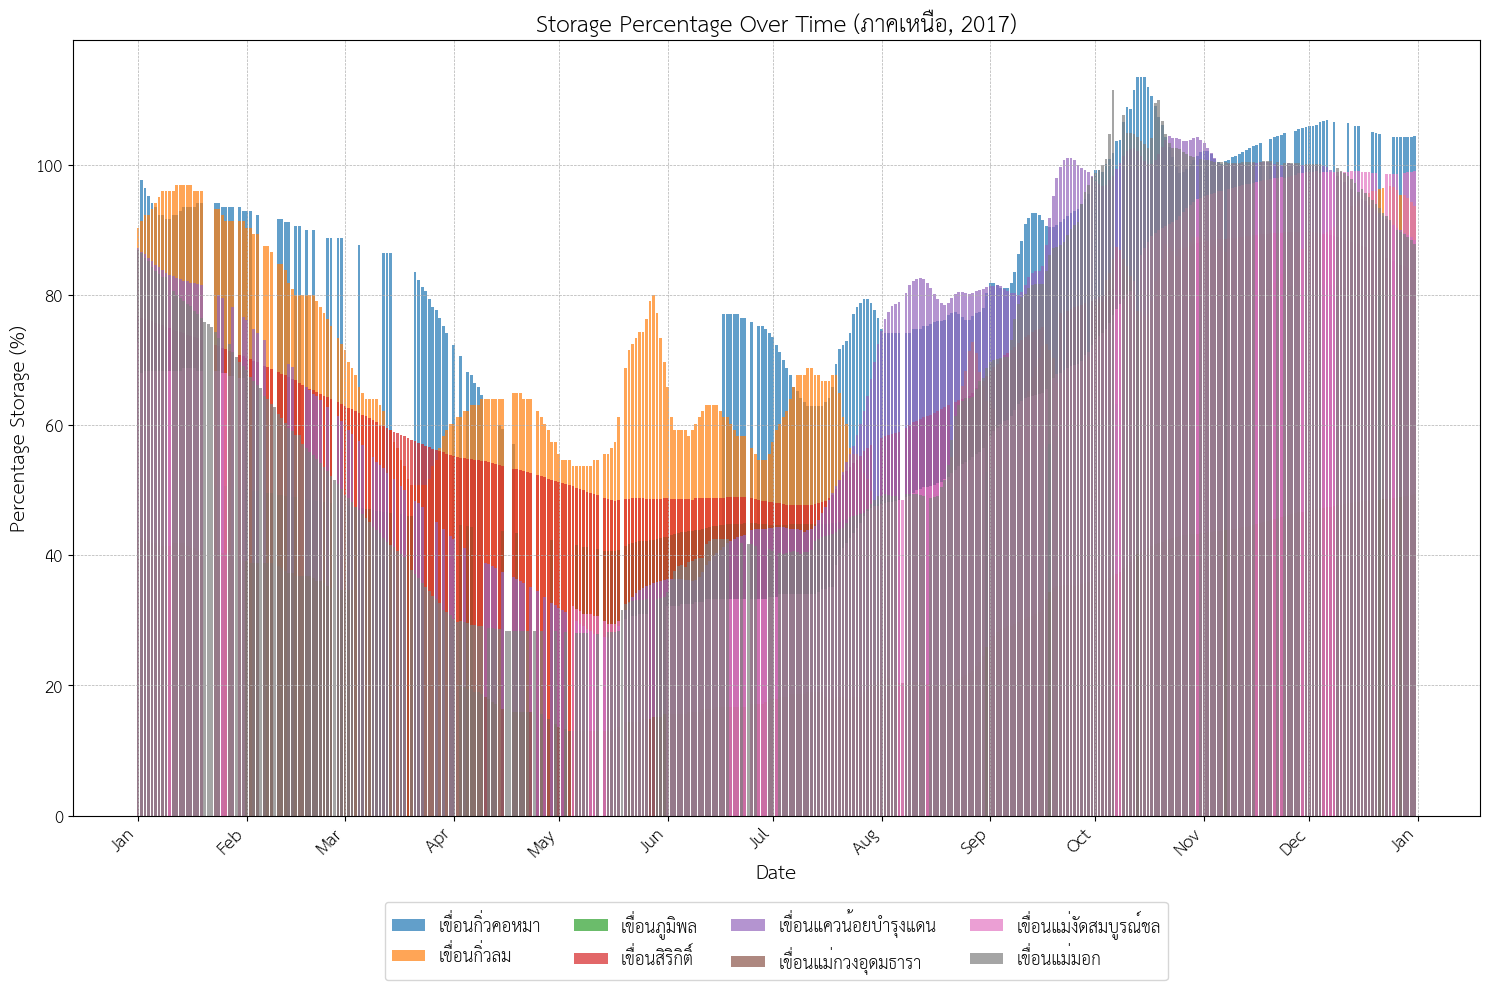

In [21]:
# กราฟไว้ดูประกอบ
# Filter the DataFrame for the desired region and year
df_north_2018 = merged_df[(merged_df['region_y'] == 'ภาคเหนือ') & (merged_df['date'].dt.year == 2017)]

# Group by date and dam name, then calculate the mean storage percentage
dam_storage = df_north_2018.groupby(['date', 'name'])['percent_storage'].mean().unstack()

# Create the bar chart
plt.figure(figsize=(15, 10))  # Increase figure size

# Plot each dam's storage percentage as a separate bar
for dam in dam_storage.columns:
    plt.bar(dam_storage.index, dam_storage[dam], label=dam, alpha=0.7)

# Title and labels
plt.title('Storage Percentage Over Time (ภาคเหนือ, 2017)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percentage Storage (%)', fontsize=14)

# Format x-axis to show month labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4, fontsize=12)  # Adjust legend position and size

# Grid
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust plot layout for better display
plt.show()



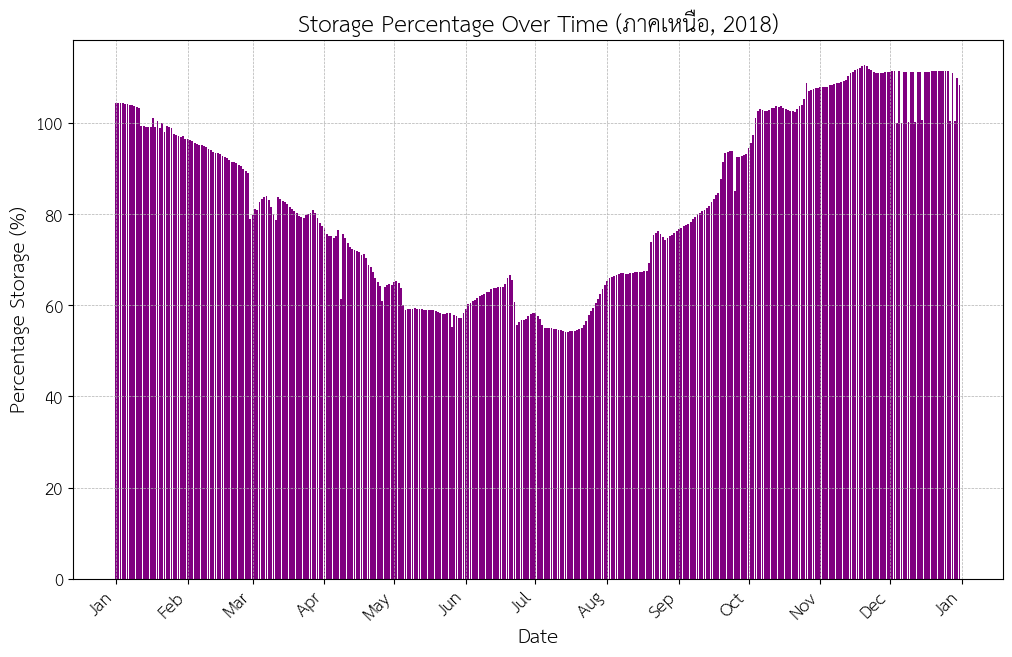

In [22]:
# signal bar chart

# Filter the DataFrame for the desired region and year
df_north_2018 = merged_df[(merged_df['region_y'] == 'ภาคเหนือ') & (merged_df['date'].dt.year == 2018)]

# Create the bar chart
plt.figure(figsize=(12, 7))
plt.bar(df_north_2018['date'], df_north_2018['percent_storage'], color='purple')

# Title and labels with larger font sizes
plt.title('Storage Percentage Over Time (ภาคเหนือ, 2018)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percentage Storage (%)', fontsize=14)

# Format x-axis to show month labels (optional, if you want to rotate the labels)
plt.gca().xaxis.set_major_locator(mpl.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mpl.dates.DateFormatter('%b'))
plt.xticks(rotation=45, ha='right')

# Improve grid style
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


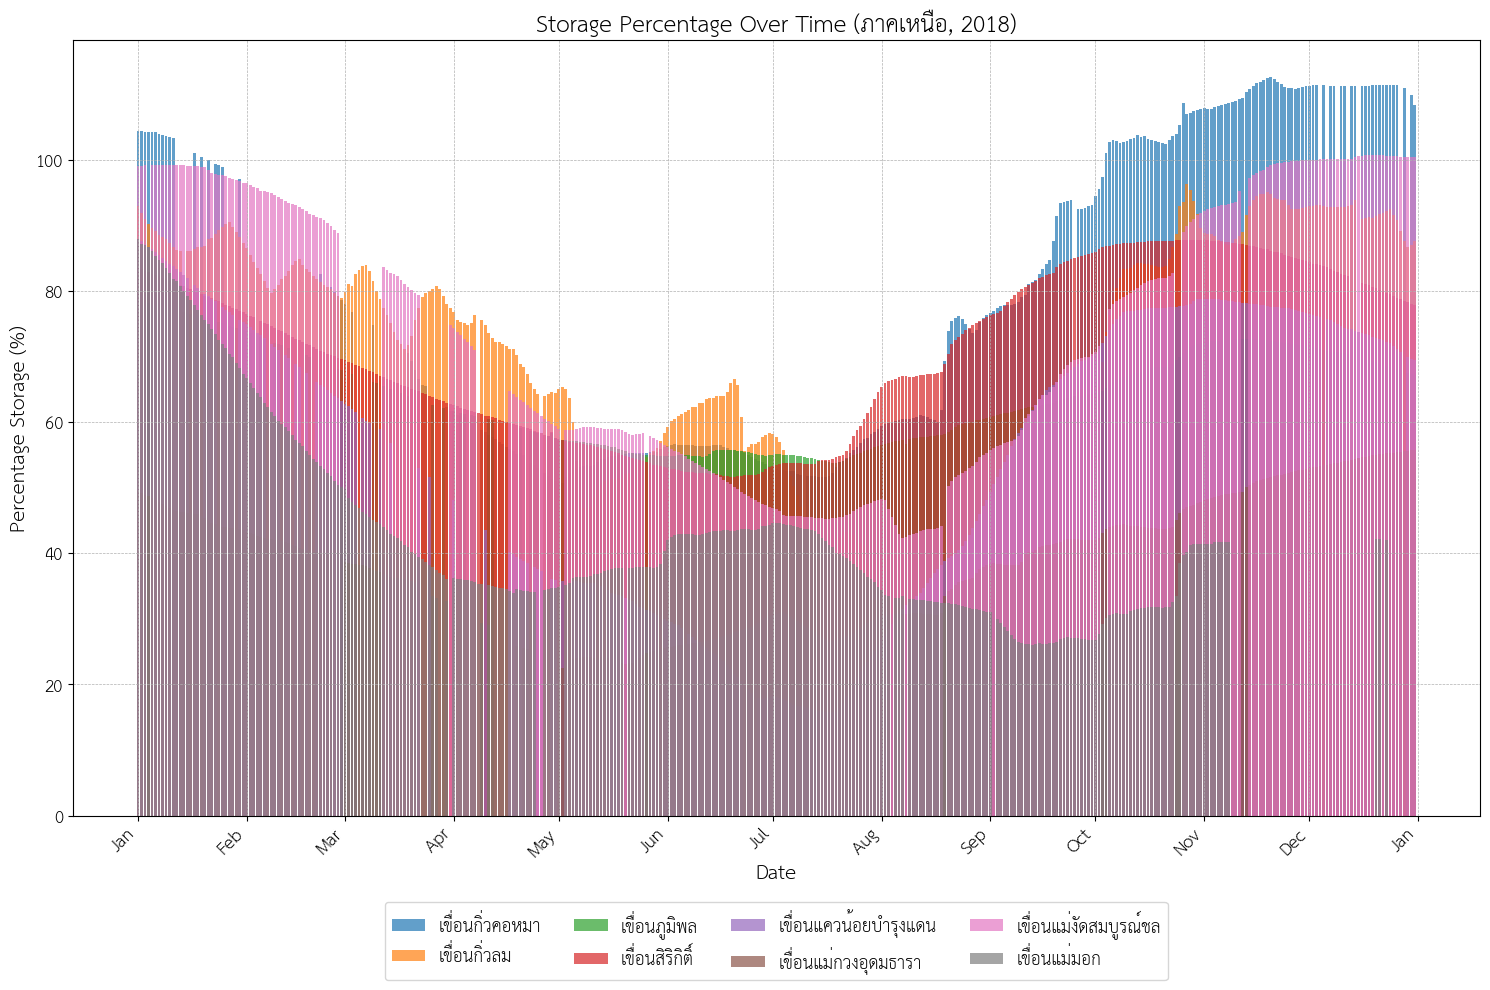

In [23]:
# กราฟไว้ดูประกอบ
# Filter the DataFrame for the desired region and year
df_north_2018 = merged_df[(merged_df['region_y'] == 'ภาคเหนือ') & (merged_df['date'].dt.year == 2018)]

# Group by date and dam name, then calculate the mean storage percentage
dam_storage = df_north_2018.groupby(['date', 'name'])['percent_storage'].mean().unstack()

# Create the bar chart
plt.figure(figsize=(15, 10))  # Increase figure size

# Plot each dam's storage percentage as a separate bar
for dam in dam_storage.columns:
    plt.bar(dam_storage.index, dam_storage[dam], label=dam, alpha=0.7)

# Title and labels
plt.title('Storage Percentage Over Time (ภาคเหนือ, 2018)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percentage Storage (%)', fontsize=14)

# Format x-axis to show month labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4, fontsize=12)  # Adjust legend position and size

# Grid
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust plot layout for better display
plt.show()



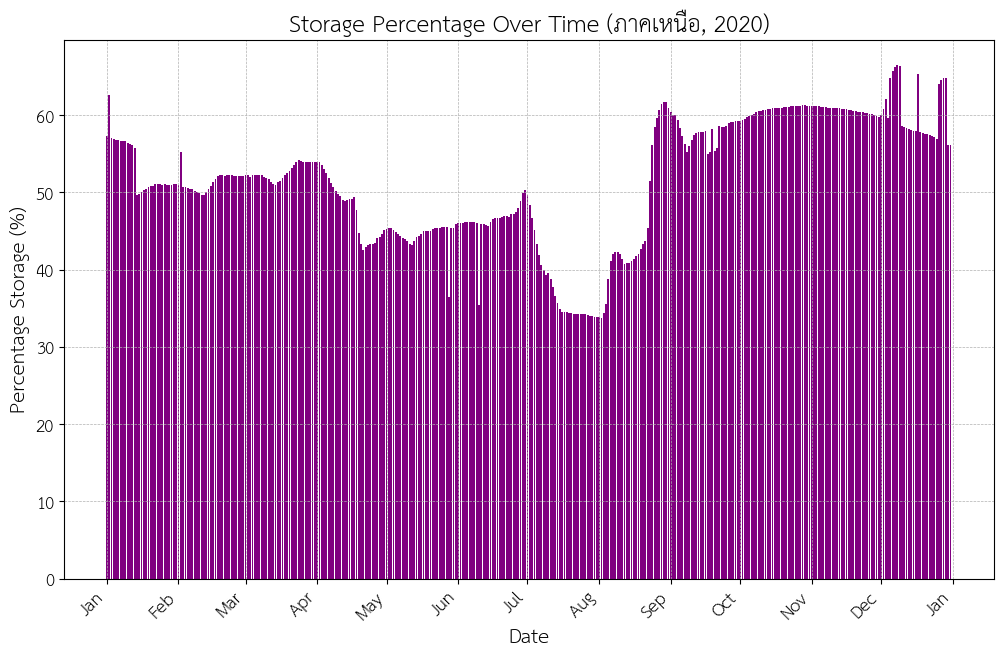

In [24]:

# Filter the DataFrame for the desired region and year
df_north_2020 = merged_df[(merged_df['region_y'] == 'ภาคเหนือ') & (merged_df['date'].dt.year == 2020)]

# Create the bar chart
plt.figure(figsize=(12, 7))
plt.bar(df_north_2020['date'], df_north_2020['percent_storage'], color='purple')

# Title and labels with larger font sizes
plt.title('Storage Percentage Over Time (ภาคเหนือ, 2020)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percentage Storage (%)', fontsize=14)

# Format x-axis to show month labels (optional, if you want to rotate the labels)
plt.gca().xaxis.set_major_locator(mpl.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mpl.dates.DateFormatter('%b'))
plt.xticks(rotation=45, ha='right')

# Improve grid style
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


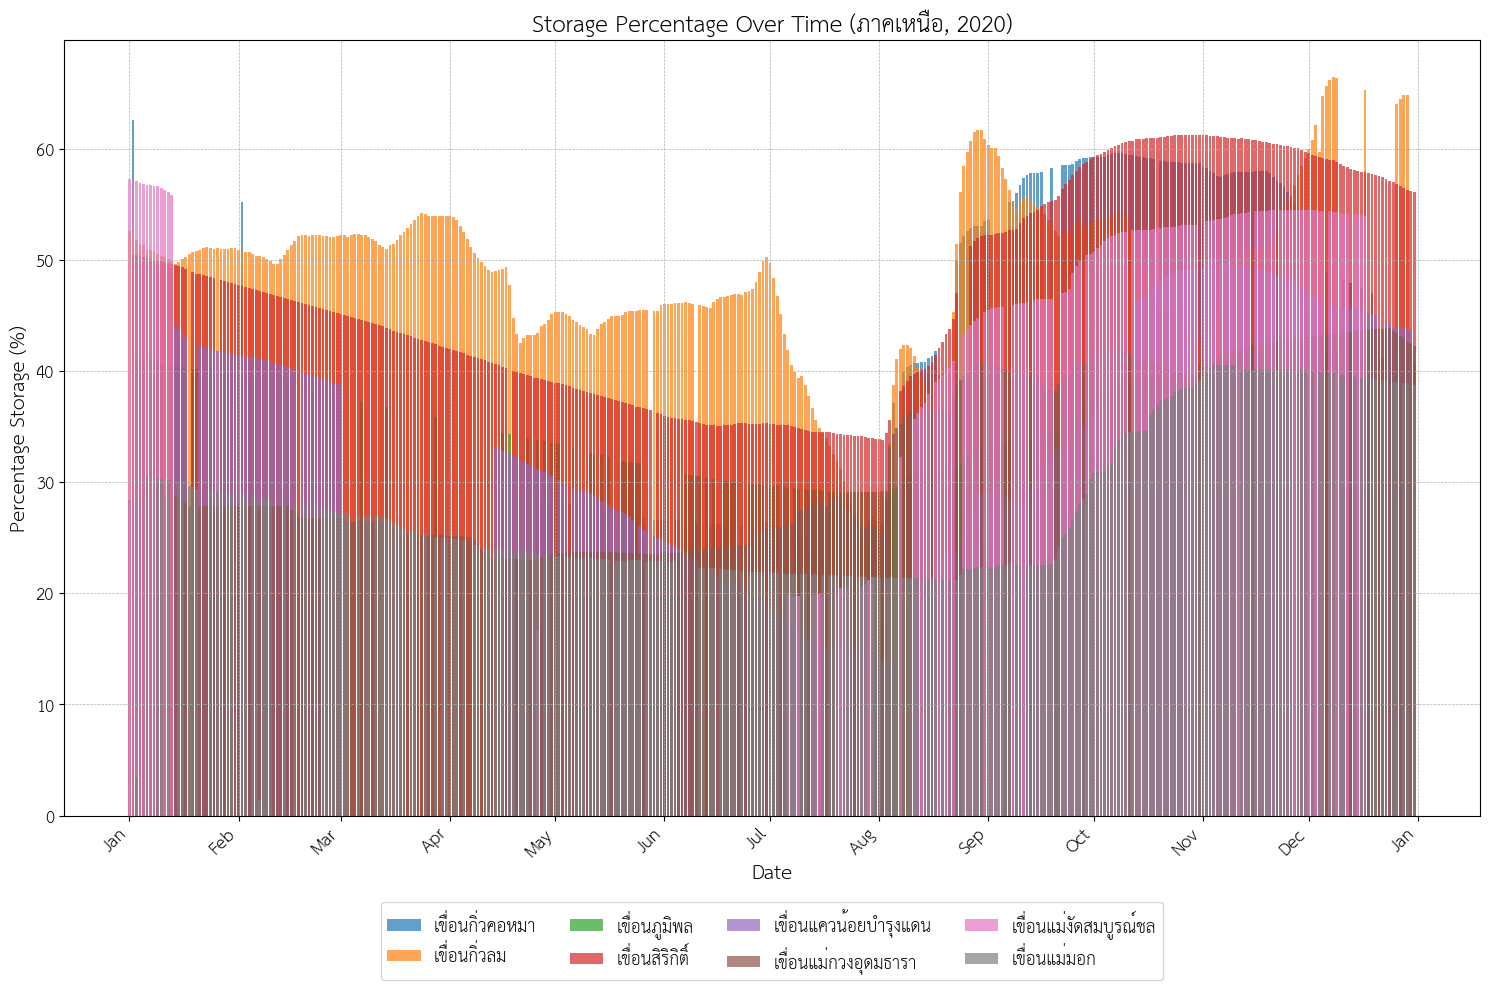

In [25]:
# กราฟไว้ดูประกอบ
# Filter the DataFrame for the desired region and year
df_north_2020 = merged_df[(merged_df['region_y'] == 'ภาคเหนือ') & (merged_df['date'].dt.year == 2020)]

# Group by date and dam name, then calculate the mean storage percentage
dam_storage = df_north_2020.groupby(['date', 'name'])['percent_storage'].mean().unstack()

# Create the bar chart
plt.figure(figsize=(15, 10))  # Increase figure size

# Plot each dam's storage percentage as a separate bar
for dam in dam_storage.columns:
    plt.bar(dam_storage.index, dam_storage[dam], label=dam, alpha=0.7)

# Title and labels
plt.title('Storage Percentage Over Time (ภาคเหนือ, 2020)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percentage Storage (%)', fontsize=14)

# Format x-axis to show month labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4, fontsize=12)  # Adjust legend position and size

# Grid
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust plot layout for better display
plt.show()



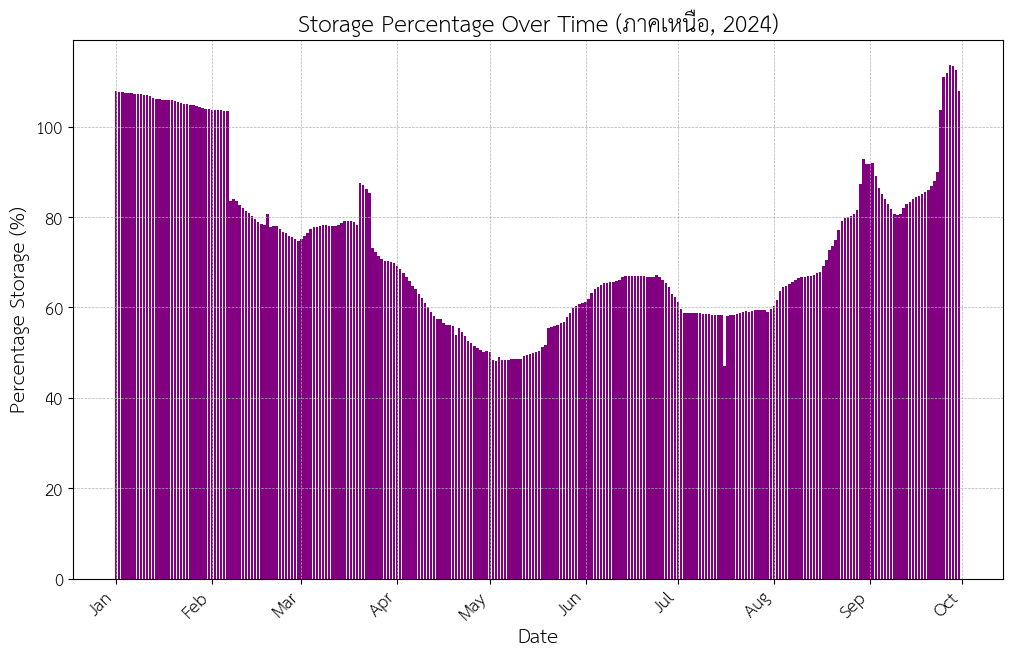

In [26]:

# Filter the DataFrame for the desired region and year
df_north_2024 = merged_df[(merged_df['region_y'] == 'ภาคเหนือ') & (merged_df['date'].dt.year == 2024)]

# Create the bar chart
plt.figure(figsize=(12, 7))
plt.bar(df_north_2024['date'], df_north_2024['percent_storage'], color='purple')

# Title and labels with larger font sizes
plt.title('Storage Percentage Over Time (ภาคเหนือ, 2024)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percentage Storage (%)', fontsize=14)

# Format x-axis to show month labels (optional, if you want to rotate the labels)
plt.gca().xaxis.set_major_locator(mpl.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mpl.dates.DateFormatter('%b'))
plt.xticks(rotation=45, ha='right')

# Improve grid style
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


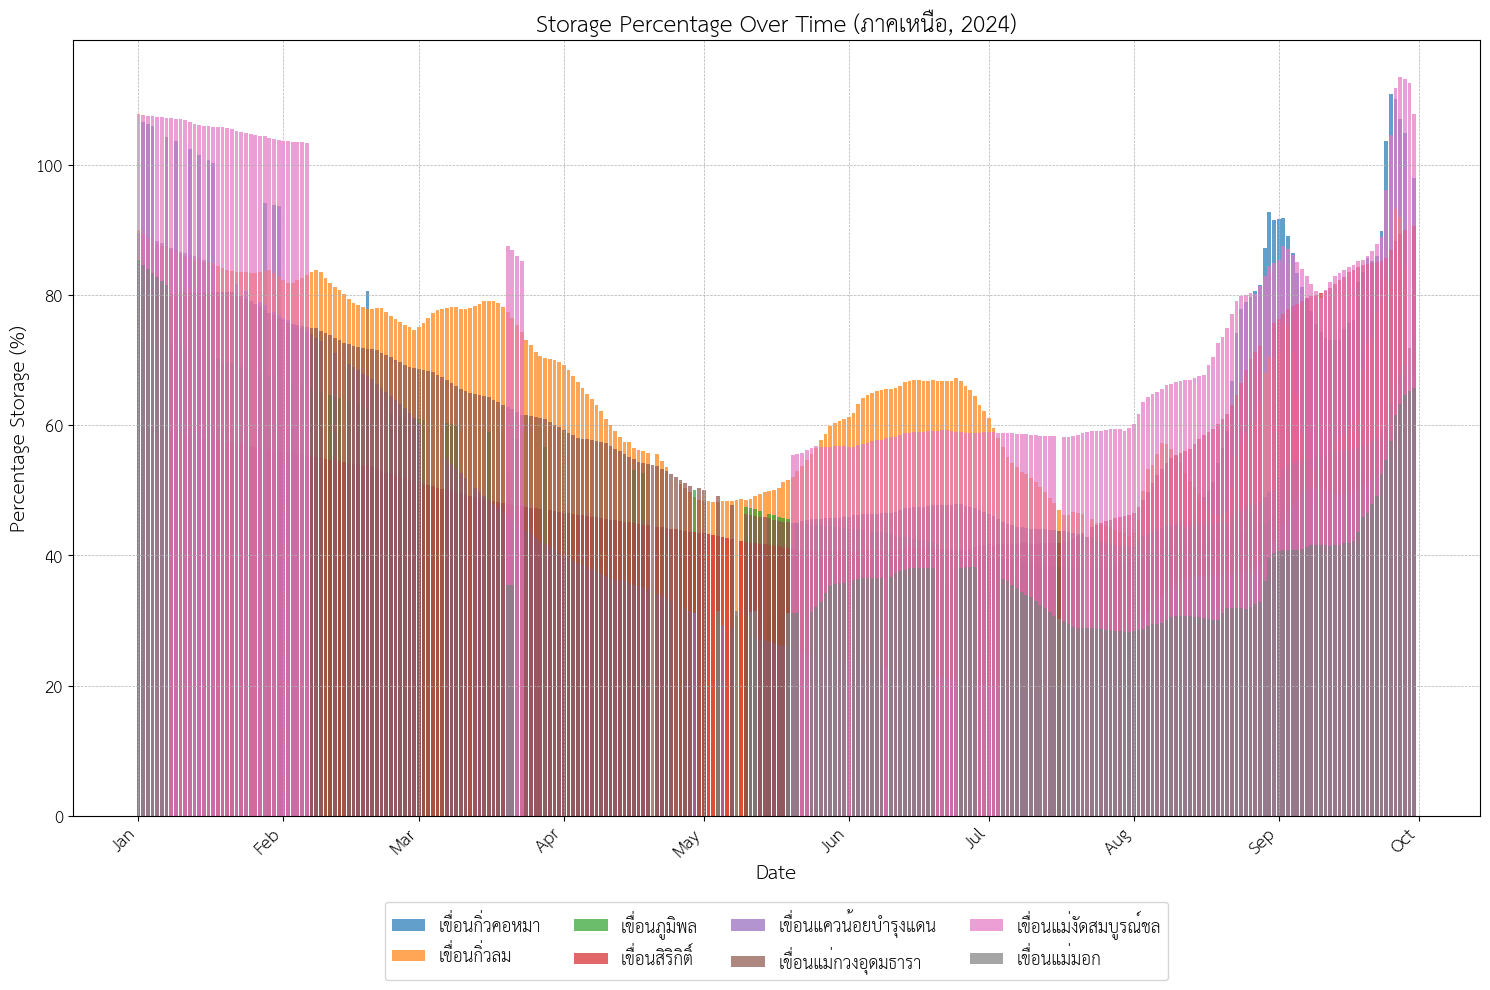

In [27]:
# กราฟไว้ดูประกอบ
# Filter the DataFrame for the desired region and year
df_north_2024 = merged_df[(merged_df['region_y'] == 'ภาคเหนือ') & (merged_df['date'].dt.year == 2024)]

# Group by date and dam name, then calculate the mean storage percentage
dam_storage = df_north_2024.groupby(['date', 'name'])['percent_storage'].mean().unstack()

# Create the bar chart
plt.figure(figsize=(15, 10))  # Increase figure size

# Plot each dam's storage percentage as a separate bar
for dam in dam_storage.columns:
    plt.bar(dam_storage.index, dam_storage[dam], label=dam, alpha=0.7)

# Title and labels
plt.title('Storage Percentage Over Time (ภาคเหนือ, 2024)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percentage Storage (%)', fontsize=14)

# Format x-axis to show month labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4, fontsize=12)  # Adjust legend position and size

# Grid
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust plot layout for better display
plt.show()



<ipython-input-28-dde07f7bb29e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df2['net_flow'] = merged_df2['inflow'] - merged_df2['outflow']
<ipython-input-28-dde07f7bb29e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df2['rating'] = merged_df2['net_flow'] / merged_df2['volume']


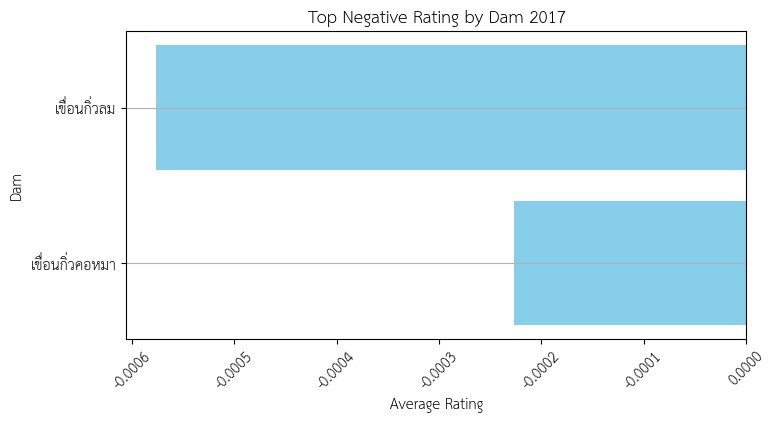

In [28]:
import numpy as np
merged_df2 = merged_df[(merged_df['region_y'] == 'ภาคเหนือ') & (merged_df['date'].dt.year == 2017)]
merged_df2['net_flow'] = merged_df2['inflow'] - merged_df2['outflow']
merged_df2['rating'] = merged_df2['net_flow'] / merged_df2['volume']

# Calculate average rating for each dam
average_ratings = merged_df2.groupby('name')['rating'].mean().reset_index()
average_ratings = average_ratings.sort_values(by='rating', ascending=False)
positive_ratings = average_ratings[average_ratings['rating'] < 0]
top_positive_ratings = positive_ratings.sort_values(by='rating', ascending=False).head(10)
# Plotting
plt.figure(figsize=(8, 4))
bar_width = 0.5
plt.barh(top_positive_ratings['name'], top_positive_ratings['rating'], color='skyblue')
plt.title('Top Negative Rating by Dam 2017')
plt.xlabel('Average Rating')
plt.ylabel('Dam')
plt.xticks(rotation=45)
plt.grid(axis='y')

<ipython-input-29-cd72acbd3988>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df2['net_flow'] = merged_df2['inflow'] - merged_df2['outflow']
<ipython-input-29-cd72acbd3988>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df2['rating'] = merged_df2['net_flow'] / merged_df2['volume']


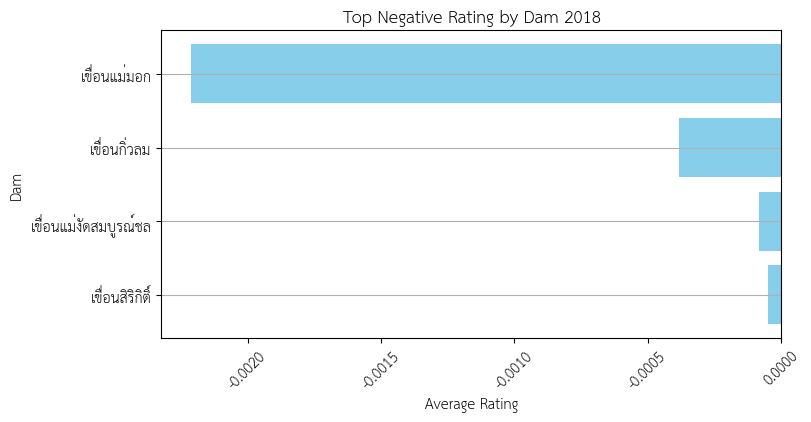

In [29]:
import numpy as np
merged_df2 = merged_df[(merged_df['region_y'] == 'ภาคเหนือ') & (merged_df['date'].dt.year == 2018)]
merged_df2['net_flow'] = merged_df2['inflow'] - merged_df2['outflow']
merged_df2['rating'] = merged_df2['net_flow'] / merged_df2['volume']

# Calculate average rating for each dam
average_ratings = merged_df2.groupby('name')['rating'].mean().reset_index()
average_ratings = average_ratings.sort_values(by='rating', ascending=False)
positive_ratings = average_ratings[average_ratings['rating'] < 0]
top_positive_ratings = positive_ratings.sort_values(by='rating', ascending=False).head(10)
# Plotting
plt.figure(figsize=(8, 4))
bar_width = 0.5
plt.barh(top_positive_ratings['name'], top_positive_ratings['rating'], color='skyblue')
plt.title('Top Negative Rating by Dam 2018')
plt.xlabel('Average Rating')
plt.ylabel('Dam')
plt.xticks(rotation=45)
plt.grid(axis='y')

<ipython-input-30-5c09f3ef6158>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df2['net_flow'] = merged_df2['inflow'] - merged_df2['outflow']
<ipython-input-30-5c09f3ef6158>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df2['rating'] = merged_df2['net_flow'] / merged_df2['volume']


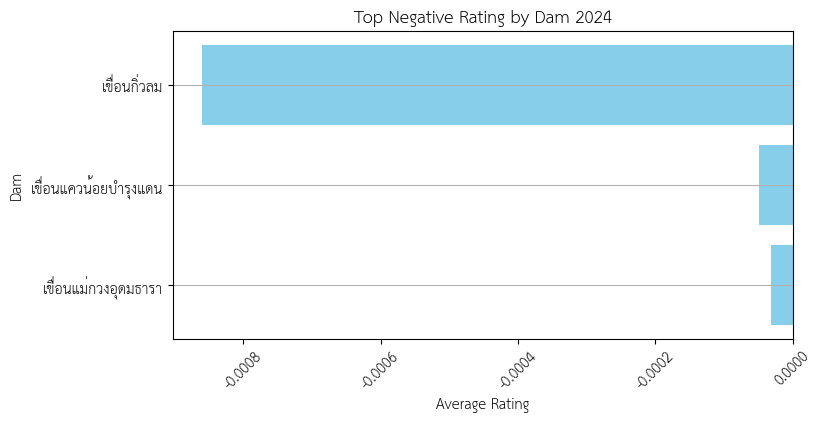

In [30]:
import numpy as np
merged_df2 = merged_df[(merged_df['region_y'] == 'ภาคเหนือ') & (merged_df['date'].dt.year == 2024)]
merged_df2['net_flow'] = merged_df2['inflow'] - merged_df2['outflow']
merged_df2['rating'] = merged_df2['net_flow'] / merged_df2['volume']

# Calculate average rating for each dam
average_ratings = merged_df2.groupby('name')['rating'].mean().reset_index()
average_ratings = average_ratings.sort_values(by='rating', ascending=False)
positive_ratings = average_ratings[average_ratings['rating'] < 0]
top_positive_ratings = positive_ratings.sort_values(by='rating', ascending=False).head(10)
# Plotting
plt.figure(figsize=(8, 4))
bar_width = 0.5
plt.barh(top_positive_ratings['name'], top_positive_ratings['rating'], color='skyblue')
plt.title('Top Negative Rating by Dam 2024')
plt.xlabel('Average Rating')
plt.ylabel('Dam')
plt.xticks(rotation=45)
plt.grid(axis='y')